In [8]:
import functions_circle_detection
import picture_creator
import functions_line_detection

import numpy as np

import matplotlib.pyplot as plt
from functools import partial

In [9]:
generator_function = partial(picture_creator.generate_random_picure)
circle_detecter_function = partial(functions_circle_detection.get_yellow_circles_cv2)
line_detecter_function = partial(functions_line_detection.get_next_pos)

In [10]:
image, positions = generator_function()
detected_positions = list(circle_detecter_function(image))

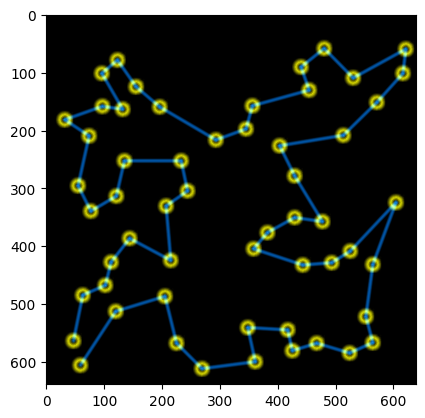

In [11]:
plt.imshow(image)

In [12]:
start_pos = 0
dist = np.linalg.norm(positions[0] - detected_positions[0])
for i in range(len(detected_positions)):
    if np.linalg.norm(positions[0] - detected_positions[i]) < dist:
        start_pos = i
        dist = np.linalg.norm(positions[0] - detected_positions[i])
print("true start_pos: ",positions[0])
print("detected start_pos: ",start_pos," : ",detected_positions[start_pos])

true start_pos:  [ 47 564]
detected start_pos:  8  :  [ 46 564]


In [13]:
remaining_positions = list(detected_positions.copy())

current_pos = remaining_positions.pop(start_pos)
i = 1

sorted_positions = [current_pos]
while len(remaining_positions) > 0:
    next_pos = line_detecter_function(image, current_pos, remaining_positions)
    print("true next_pos: ",positions[i])
    i += 1
    print("detected next_pos: ",remaining_positions[next_pos])
    print("")
    current_pos = remaining_positions.pop(next_pos)
    sorted_positions.append(current_pos)


true next_pos:  [ 63 485]
detected next_pos:  [ 62 485]

true next_pos:  [102 468]
detected next_pos:  [101 468]

true next_pos:  [112 428]
detected next_pos:  [111 428]

true next_pos:  [144 387]
detected next_pos:  [143 387]

true next_pos:  [215 425]
detected next_pos:  [214 425]

true next_pos:  [207 331]
detected next_pos:  [206 331]

true next_pos:  [244 305]
detected next_pos:  [243 305]

true next_pos:  [233 253]
detected next_pos:  [232 253]

true next_pos:  [135 253]
detected next_pos:  [134 253]

true next_pos:  [121 314]
detected next_pos:  [120 314]

true next_pos:  [ 77 340]
detected next_pos:  [ 76 340]

true next_pos:  [ 55 296]
detected next_pos:  [ 54 296]

true next_pos:  [ 74 210]
detected next_pos:  [ 73 210]

true next_pos:  [ 32 182]
detected next_pos:  [ 31 182]

true next_pos:  [ 97 159]
detected next_pos:  [ 96 159]

true next_pos:  [132 164]
detected next_pos:  [131 164]

true next_pos:  [ 96 102]
detected next_pos:  [ 95 102]

true next_pos:  [123  79]
detec

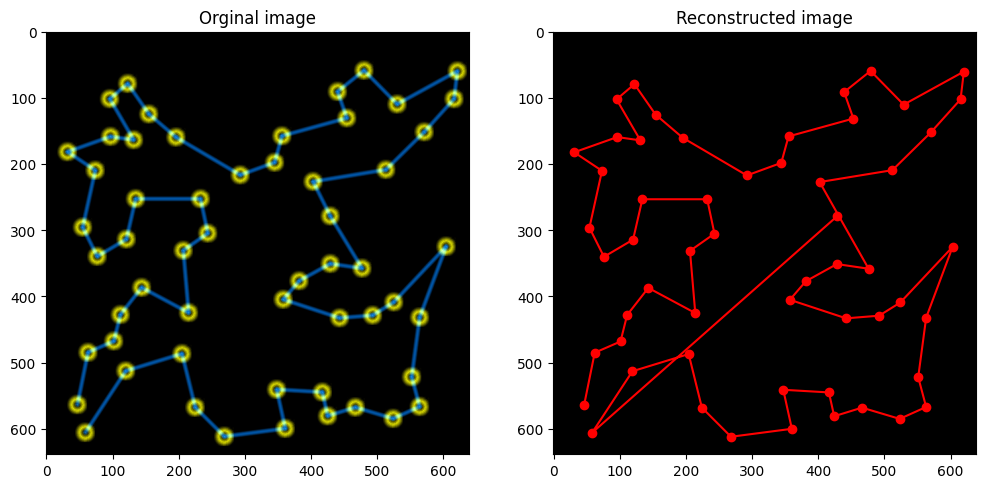

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')